**ChatBot History**: https://chatgpt.com/share/673f9e6f-a1e4-8003-9338-cbf10cb65c21 <br>
Data Preprocessing: We started by discussing how to preprocess and clean a dataset (ab_reduced_noNaN) from an Amazon books dataset. You were focused on predicting whether a book is a hardcover or paperback based on certain features. <br>

Model Training: We trained two different decision tree classifiers (clf and clf2). The first used only List Price as a feature, and the second used multiple features: NumPages, Thick, and List Price. We also discussed setting the maximum depth of the trees to 4 for both models to avoid overfitting.<br>

Evaluation with Confusion Matrix: We computed and visualized confusion matrices for both models. The confusion matrix provides insights into the model's performance by showing the counts of true positives, false positives, true negatives, and false negatives. We also normalized the confusion matrices to show the results as percentages.<br>

Performance Metrics: We calculated important evaluation metrics like accuracy, sensitivity (recall), and specificity for both models, interpreting the results to understand their performance in predicting whether a book is hardcover or paperback.<br>

Test vs. Training Data: We discussed the importance of evaluating models using test data rather than training data, which could lead to overfitting. You were correct in noting that using test data helps assess the model's generalization to unseen data.<br>

Confusion Matrix Interpretation: You asked about confusion matrix interpretation and the role of decimals in it. I explained that decimals represent the normalized values (percentages) of true positives, false positives, etc., to better understand model performance.<br>

Comparison of Models: We explored how using different features in the two models (clf with only List Price and clf2 with additional features) could impact performance, and we compared confusion matrices based on training and test data.<br>

## 1 
**Real-World Applications:**
- Medical Diagnosis: Classifying whether a patient has a disease based on symptoms and test results (e.g., diabetes detection).
- Fraud Detection: Identifying whether a transaction is fraudulent based on transaction patterns.
- Customer Segmentation: Categorizing customers into groups based on purchasing behavior.
- Spam Detection: Classifying emails as spam or not spam based on their content.
- Loan Default Prediction: Determining whether a loan applicant will default based on credit history and other financial indicators.
**Difference between Classification Tree and Linear Regression:**
- Nature of Predictions:

Classification Decision Tree: Predicts categorical outcomes (e.g., "Yes" or "No", "Class A" or "Class B"). It assigns observations to predefined classes based on decision rules derived from the training data.
Multiple Linear Regression: Predicts continuous numeric outcomes (e.g., house prices, temperature). It calculates a value by fitting a linear equation to the data. <br>
- Handling Output:

Classification Decision Tree: Produces discrete outputs that correspond to class labels.
Multiple Linear Regression: Produces continuous outputs, which are often interpreted as numeric predictions.

## 2. What real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

- **Accuracy** measures the proportion of true results (both true positives and true negatives) in the population.
Usefulness: Best when the cost of false positives and false negatives is roughly the same and the classes are balanced.

Application: Quality control in a factory producing light bulbs. Identify how many true identification is made about the bulbs
Explanation: Accuracy would be useful to measure the proportion of correctly classified bulbs( either they are identified as defective or non-defective) out of all inspected bulbs, as the cost of false positives (labeling a functional bulb as defective) and false negatives (labeling a defective bulb as functional) is similar.

- **Sensitivity** measures the proportion of actual positives that are correctly identified.
Usefulness: Crucial in situations where missing positive cases is very costly or dangerous.

Application: Medical diagnosis of cancer.
Explanation: Sensitivity is vital because identifying all patients with cancer is critical, and misdianosed a case with cancer as non-cancer (false negative) could lead to untreated cases, which might have severe consequences. Using sensitivity in this case will find out how accurate the equipments are when dianosing patients.

- **Specificity** measures the proportion of actual negatives that are correctly identified.
Usefulness: Important in scenarios where false positives can lead to unnecessary or harmful consequences.

Application: HIV screening in blood donations.
Explanation: Specificity in this case measures how accurately non-HIV (clean) blood is identified as clean. A high specificity means that few clean blood samples are falsely identified as contaminated (false positives). This is particularly important because falsely labeling clean blood as contaminated can lead to the unnecessary rejection of usable blood, wasting resources and reducing the available supply for patients in need

- **Precision** measures the proportion of positive identifications that were actually correct.
Usefulness: Critical when the cost of false positives is high.

Application: Spam detection in email systems.
Explanation: Spam emails are classified as positive, while non-spam messages incorrectly flagged as spam are false positives. Precision in this context assesses how accurately the system identifies spam emails, ensuring that only actual spam is flagged. A low precision rate could result in important emails, such as job offers or legal notices, being wrongly marked as spam, which could cause significant inconvenience or harm to users.

## 4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")



Number of observations in the training set: 259
Number of observations in the test set: 65


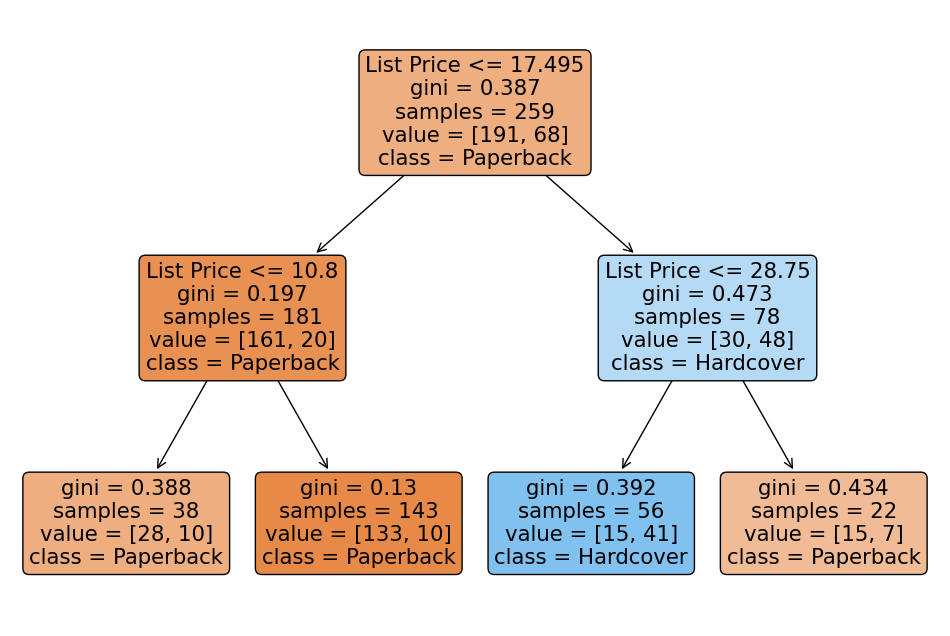

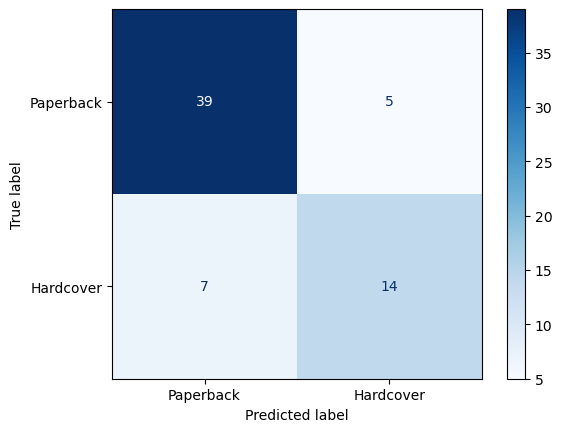

Accuracy: 0.815
Sensitivity (Recall): 0.667
Specificity: 0.886


In [2]:
# Remove rows with missing values (NaNs) to ensure clean data
ab_reduced_noNaN = ab.dropna(subset=["Hard_or_Paper", "List Price"])

# Perform the 80/20 train-test split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations in the training and test sets
print(f"Number of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the test set: {len(ab_reduced_noNaN_test)}")

# Encode the target variable as binary: 1 for Hardcover, 0 for Paperback
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Feature variable (List Price)
X_train = ab_reduced_noNaN_train[['List Price']]
X_test = ab_reduced_noNaN_test[['List Price']]

# Initialize the DecisionTreeClassifier with max_depth = 2
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], rounded=True)
plt.show()

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Paperback", "Hardcover"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate the accuracy, sensitivity, and specificity
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # True Negative Rate

# Print the metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")


**y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']**

- What the line above does:converts the Hard_or_Paper column from the ab_reduced_noNaN DataFrame into a binary format suitable for classification. The column is likely categorical, with at least two values (e.g., 'H' for "Hardcover" and 'P' for "Paperback"). <br>

pd.get_dummies(...): Converts categorical data into dummy/indicator variables (one-hot encoding).
['H']: Selects the dummy column corresponding to the category 'H'.<br>
- Result:<br>
A binary series (y) where:<br>
1: Represents the 'H' (Hardcover) category.<br>
0: Represents all other categories (likely 'P', Paperback).<br>
- Purpose:This creates the target variable (y) for the classification model, where the model will predict whether an instance belongs to the "Hardcover" class (1) or not (0).<br>

**X = ab_reduced_noNaN[['List Price']]**
- What it does: This selects the List Price column from the ab_reduced_noNaN DataFrame as the feature(s) for the model. <br>

- [['List Price']]: Ensures the result is a DataFrame (2D structure), which is required for scikit-learn models.<br>
Result: A DataFrame (X) with one feature: the List Price of items.<br>

- Purpose:<br>
This defines the input feature(s) the model will use to make predictions about the target variable (y).<br>

**Answer**
- Number of observation (restate from above): <br>
Number of observations in the training set: 259 <br>
Number of observations in the test set: 65
- tree.plot_tree(clf) give the predictions about whether a book is hardcover or paperback are made entirely based on the List Price.

## 5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

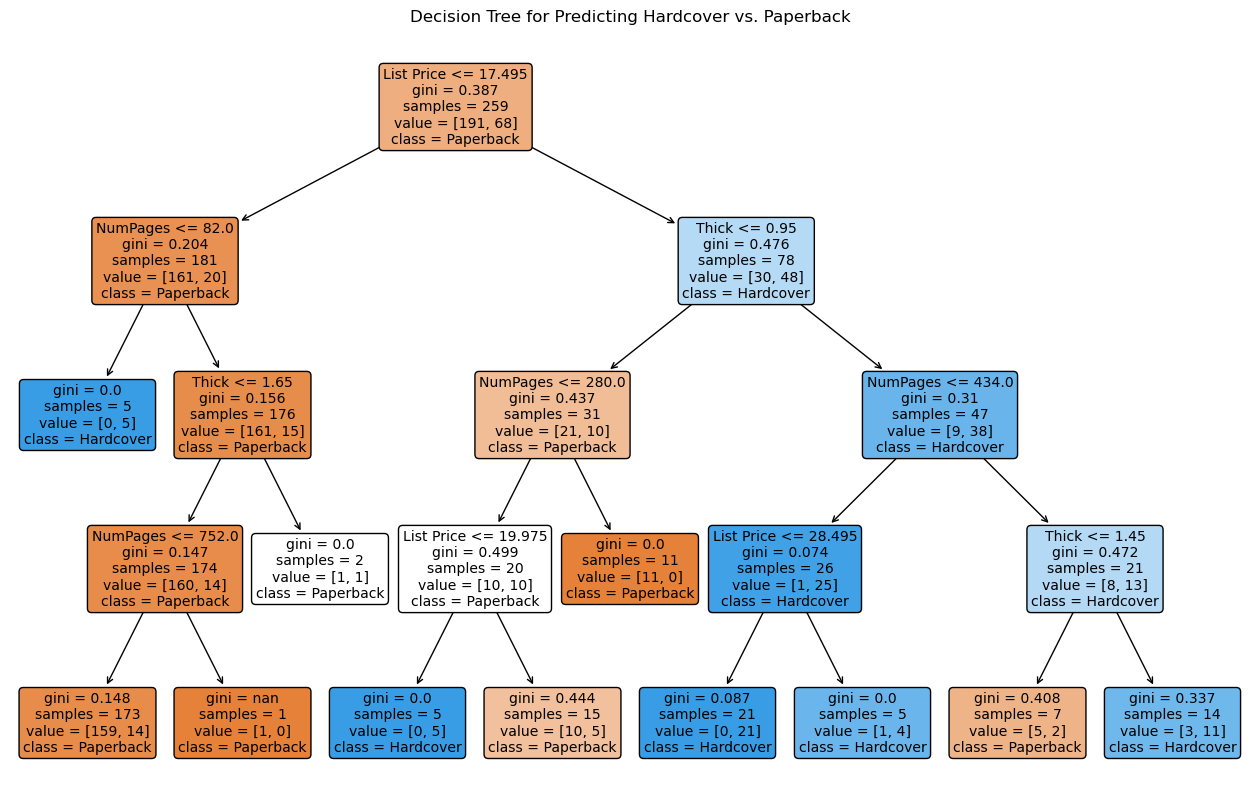

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the target variable and features
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])["H"]
X = ab_reduced_noNaN[["NumPages", "Thick", "List Price"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(16, 10))
plot_tree(
    clf2,
    feature_names=["NumPages", "Thick", "List Price"],
    class_names=["Paperback", "Hardcover"],
    filled=True,
    rounded=True,
)
plt.title("Decision Tree for Predicting Hardcover vs. Paperback")
plt.show()


The predictions in the clf2 model are based on NumPages, Thick, and List Price, making it more complex and different from the clf model, which uses only List Price.

## 6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

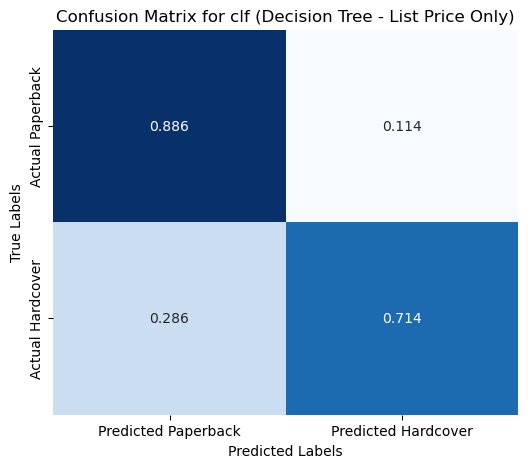

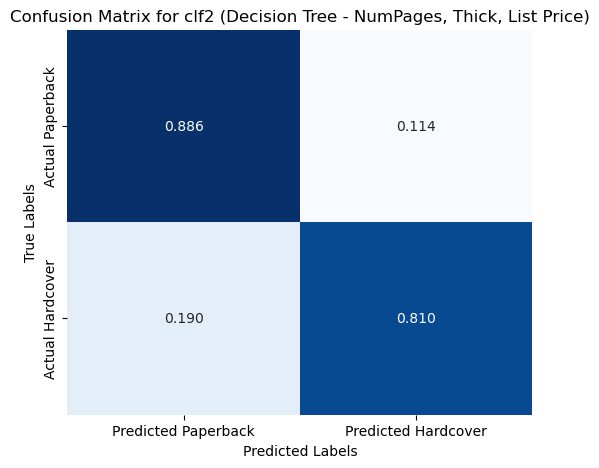

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the feature matrix X and target variable y for clf
X_clf = ab_reduced_noNaN[["List Price"]]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])["H"]  # Hardcover = 1, Paperback = 0

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_clf, y, test_size=0.2, random_state=42)

# Train the DecisionTreeClassifier (clf)
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Generate predictions for clf
y_test_pred_clf = clf.predict(X_test[["List Price"]])

# Create confusion matrix for clf
conf_matrix_clf = confusion_matrix(y_test, y_test_pred_clf)

# Normalize the confusion matrix to get percentages
conf_matrix_percentage_clf = conf_matrix_clf.astype('float') / conf_matrix_clf.sum(axis=1)[:, np.newaxis]

# Plot Confusion Matrix for clf
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_percentage_clf, annot=True, fmt=".3f", cmap="Blues", cbar=False,
            xticklabels=["Predicted Paperback", "Predicted Hardcover"], 
            yticklabels=["Actual Paperback", "Actual Hardcover"])
plt.title("Confusion Matrix for clf (Decision Tree - List Price Only)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Define the feature matrix X for clf2 (using NumPages, Thick, List Price)
X_clf2 = ab_reduced_noNaN[["NumPages", "Thick", "List Price"]]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_clf2, y, test_size=0.2, random_state=42)

# Train the DecisionTreeClassifier (clf2)
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Generate predictions for clf2
y_test_pred_clf2 = clf2.predict(X_test[["NumPages", "Thick", "List Price"]])

# Create confusion matrix for clf2
conf_matrix_clf2 = confusion_matrix(y_test, y_test_pred_clf2)

# Normalize the confusion matrix to get percentages
conf_matrix_percentage_clf2 = conf_matrix_clf2.astype('float') / conf_matrix_clf2.sum(axis=1)[:, np.newaxis]

# Plot Confusion Matrix for clf2
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_percentage_clf2, annot=True, fmt=".3f", cmap="Blues", cbar=False,
            xticklabels=["Predicted Paperback", "Predicted Hardcover"], 
            yticklabels=["Actual Paperback", "Actual Hardcover"])
plt.title("Confusion Matrix for clf2 (Decision Tree - NumPages, Thick, List Price)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**Report sensitivity, specificity and accuracy for each of the model**
- clf model <br>
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf) = (0.714 + 0.886)/ (0.886+0.114+0.286+0.714) = 0.800 <br>
sensitivity_clf = TP_clf / (TP_clf + FN_clf) = 0.714 / (0.714 + 0.286) = 0.714<br>
specificity_clf = TN_clf / (TN_clf + FP_clf) = 0.886 / (0.886 + 0.114) = 0. 886<br>

- clf2 model <br>
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2) = (0.810 + 0.886)/(0.810+0.886+0.190+0.114)= 0.848<br>
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2) = 0.810/ (0.810+0.190) = 0.810<br>
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2) = 0.886 / (0.886+0.114) = 0.886<br>

## 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

In [15]:
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf2.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

AttributeError: 'DataFrame' object has no attribute 'your_actual_outcome_variable'

The two given confusion matrices are different from each other based on the features used in the model training. The first confusion matrix uses only List Price as the feature, while the second matrix includes NumPages, Thick, and List Price as features. Adding more features (especially those that may better capture the distinctions between paperback and hardcover books, such as NumPages and Thick) likely leads to better performance in the second model (clf2), as it has more information to make predictions. This could result in better classifications, especially for books that are harder to differentiate based on just the list price. The two given matrices create confusion matrices based on the training data, which can lead to overfitting, as the model is evaluated on the same data it was trained on. This doesn’t measure how well the model generalizes to new, unseen data. On the other hand, the clf and clf2 models use the test data to evaluate how well the model generalizes after being trained, giving a better indication of the model’s ability to handle new data and capture variability in real-world situations